Part-I: GDP Analysis of the Indian States

Importing useful libraries below

In [86]:
import pandas as pd
import numpy as np
import re
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

Importing State Wise GDP Dataset

In [2]:
os.chdir("F:\\UpGrad\\GDP\\dataset")
gdp_india = pd.read_csv("State-Wise_GDP_for_India.csv")
gdp_india

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


Checking out the shape and other details of the data

In [3]:
print(gdp_india.describe())
print(gdp_india.shape)

       Andhra Pradesh   Arunachal Pradesh          Assam          Bihar  \
count        11.000000           9.000000       9.000000       9.000000   
mean     280986.561818        8201.516667  100018.167778  181565.673333   
std      282573.532407        8073.276061   97589.497456  178700.497677   
min           8.430000          12.070000       9.560000      10.590000   
25%          14.025000          14.790000      13.190000      14.250000   
50%      379402.000000       11063.000000  143175.000000  247144.000000   
75%      495370.000000       14602.000000  177745.000000  317101.000000   
max      699307.000000       18784.000000  224234.000000  413503.000000   

        Chhattisgarh           Goa        Gujarat        Haryana  \
count      11.000000      9.000000       9.000000      11.000000   
mean   120748.879091  22450.120000  448568.674444  228667.271818   
std    120928.480448  21443.429799  438025.627165  228195.895576   
min        10.980000    -10.020000      10.820000   

Filtering out union terorrities(under Central Government) and WB(no data)

In [4]:
gdp_india = gdp_india[gdp_india.Duration != "2016-17"]
gdp_india.drop(["West Bengal1", "Andaman & Nicobar Islands", "Chandigarh", "Delhi", "Puducherry"], axis = 1, inplace = True)
gdp_india

C:\Users\sanan\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,227872.00,266628.00,436465.00,11165.00,751485.00,359433.00,19208.00,724049.00,115523.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,258275.00,297734.00,494004.00,12338.00,855481.00,401493.00,21663.00,822903.00,131835.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,291709.00,334714.00,549701.00,13862.00,971090.00,452186.00,25593.00,944146.00,149817.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,321971.00,368011.00,612194.00,15209.00,1092564.00,511178.00,29667.00,1043371.00,161985.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,341887.00,NaN,NaN,16637.00,1212668.00,575631.00,NaN,1153795.00,184091.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99


In [5]:
gdp_india = gdp_india.reset_index(drop = True)
print(gdp_india)

                   Items  Description Duration  Andhra Pradesh   \
0  GSDP - CURRENT PRICES (` in Crore)  2011-12        379402.00   
1  GSDP - CURRENT PRICES (` in Crore)  2012-13        411404.00   
2  GSDP - CURRENT PRICES (` in Crore)  2013-14        464272.00   
3  GSDP - CURRENT PRICES (` in Crore)  2014-15        526468.00   
4  GSDP - CURRENT PRICES (` in Crore)  2015-16        609934.00   
5       (% Growth over previous year)  2012-13             8.43   
6       (% Growth over previous year)  2013-14            12.85   
7       (% Growth over previous year)  2014-15            13.40   
8       (% Growth over previous year)  2015-16            15.85   

   Arunachal Pradesh      Assam      Bihar  Chhattisgarh       Goa    Gujarat  \
0           11063.00  143175.00  247144.00     158074.00  42367.00  615606.00   
1           12547.00  156864.00  282368.00     177511.00  38120.00  724495.00   
2           14602.00  177745.00  317101.00     206690.00  35921.00  807623.00   
3    

Data for irrelevant years removed.

In [6]:
gdp_india_cp = gdp_india.iloc[:5, :]
gdp_india_growth = gdp_india.iloc[5:, :]
gdp_india_cp = gdp_india_cp.reset_index(drop = True)
gdp_india_growth = gdp_india_growth.reset_index(drop = True)
print(gdp_india_cp)
print(gdp_india_growth)

                   Items  Description Duration  Andhra Pradesh   \
0  GSDP - CURRENT PRICES (` in Crore)  2011-12         379402.0   
1  GSDP - CURRENT PRICES (` in Crore)  2012-13         411404.0   
2  GSDP - CURRENT PRICES (` in Crore)  2013-14         464272.0   
3  GSDP - CURRENT PRICES (` in Crore)  2014-15         526468.0   
4  GSDP - CURRENT PRICES (` in Crore)  2015-16         609934.0   

   Arunachal Pradesh     Assam     Bihar  Chhattisgarh      Goa   Gujarat  \
0            11063.0  143175.0  247144.0      158074.0  42367.0  615606.0   
1            12547.0  156864.0  282368.0      177511.0  38120.0  724495.0   
2            14602.0  177745.0  317101.0      206690.0  35921.0  807623.0   
3            16761.0  198098.0  373920.0      234982.0  40633.0  895027.0   
4            18784.0  224234.0  413503.0      260776.0  45002.0  994316.0   

    Haryana      ...          Odisha    Punjab  Rajasthan   Sikkim  \
0  297539.0      ...        227872.0  266628.0   436465.0  11165

Cleaning of null/dirty values

In [7]:
print(gdp_india_cp.isna().sum())
print(gdp_india_growth.isna().sum())

Items  Description    0
Duration              0
Andhra Pradesh        0
Arunachal Pradesh     0
Assam                 0
Bihar                 0
Chhattisgarh          0
Goa                   0
Gujarat               0
Haryana               0
Himachal Pradesh      1
Jammu & Kashmir       0
Jharkhand             0
Karnataka             0
Kerala                0
Madhya Pradesh        0
Maharashtra           1
Manipur               1
Meghalaya             0
Mizoram               1
Nagaland              1
Odisha                0
Punjab                1
Rajasthan             1
Sikkim                0
Tamil Nadu            0
Telangana             0
Tripura               1
Uttar Pradesh         0
Uttarakhand           0
All_India GDP         0
dtype: int64
Items  Description    0
Duration              0
Andhra Pradesh        0
Arunachal Pradesh     0
Assam                 0
Bihar                 0
Chhattisgarh          0
Goa                   0
Gujarat               0
Haryana               0
Him

In [8]:
gdp_india_cp = gdp_india_cp.fillna(gdp_india_cp.loc[:].mean())
gdp_india_growth = gdp_india_growth.fillna(gdp_india_growth.loc[:].mean())
print(gdp_india_cp.isna().sum())
print(gdp_india_growth.isna().sum())

Items  Description    0
Duration              0
Andhra Pradesh        0
Arunachal Pradesh     0
Assam                 0
Bihar                 0
Chhattisgarh          0
Goa                   0
Gujarat               0
Haryana               0
Himachal Pradesh      0
Jammu & Kashmir       0
Jharkhand             0
Karnataka             0
Kerala                0
Madhya Pradesh        0
Maharashtra           0
Manipur               0
Meghalaya             0
Mizoram               0
Nagaland              0
Odisha                0
Punjab                0
Rajasthan             0
Sikkim                0
Tamil Nadu            0
Telangana             0
Tripura               0
Uttar Pradesh         0
Uttarakhand           0
All_India GDP         0
dtype: int64
Items  Description    0
Duration              0
Andhra Pradesh        0
Arunachal Pradesh     0
Assam                 0
Bihar                 0
Chhattisgarh          0
Goa                   0
Gujarat               0
Haryana               0
Him

In [9]:
print(gdp_india_cp)
print(gdp_india_growth)

                   Items  Description Duration  Andhra Pradesh   \
0  GSDP - CURRENT PRICES (` in Crore)  2011-12         379402.0   
1  GSDP - CURRENT PRICES (` in Crore)  2012-13         411404.0   
2  GSDP - CURRENT PRICES (` in Crore)  2013-14         464272.0   
3  GSDP - CURRENT PRICES (` in Crore)  2014-15         526468.0   
4  GSDP - CURRENT PRICES (` in Crore)  2015-16         609934.0   

   Arunachal Pradesh     Assam     Bihar  Chhattisgarh      Goa   Gujarat  \
0            11063.0  143175.0  247144.0      158074.0  42367.0  615606.0   
1            12547.0  156864.0  282368.0      177511.0  38120.0  724495.0   
2            14602.0  177745.0  317101.0      206690.0  35921.0  807623.0   
3            16761.0  198098.0  373920.0      234982.0  40633.0  895027.0   
4            18784.0  224234.0  413503.0      260776.0  45002.0  994316.0   

    Haryana      ...          Odisha     Punjab  Rajasthan   Sikkim  \
0  297539.0      ...        227872.0  266628.00   436465.0  111

Average GDSP calculated for all states

In [10]:
gdp_india_cp.loc["average_gdsp"] = gdp_india_cp.mean()
gdp_india_growth.loc["avearge_growth"] = gdp_india_growth.mean()
print(gdp_india_cp)
print(gdp_india_growth)

                              Items  Description Duration  Andhra Pradesh   \
0             GSDP - CURRENT PRICES (` in Crore)  2011-12         379402.0   
1             GSDP - CURRENT PRICES (` in Crore)  2012-13         411404.0   
2             GSDP - CURRENT PRICES (` in Crore)  2013-14         464272.0   
3             GSDP - CURRENT PRICES (` in Crore)  2014-15         526468.0   
4             GSDP - CURRENT PRICES (` in Crore)  2015-16         609934.0   
average_gdsp                                 NaN      NaN         478296.0   

              Arunachal Pradesh     Assam     Bihar  Chhattisgarh      Goa  \
0                       11063.0  143175.0  247144.0      158074.0  42367.0   
1                       12547.0  156864.0  282368.0      177511.0  38120.0   
2                       14602.0  177745.0  317101.0      206690.0  35921.0   
3                       16761.0  198098.0  373920.0      234982.0  40633.0   
4                       18784.0  224234.0  413503.0      260776

In [11]:
gdp_india_growth = gdp_india_growth.drop(["Items  Description", "Duration"], axis=1)
gdp_india_growth.sort_values('avearge_growth', axis = 1, inplace = True)

Average growth of states for the duration 2013-14, 2014-15 and 2015-16

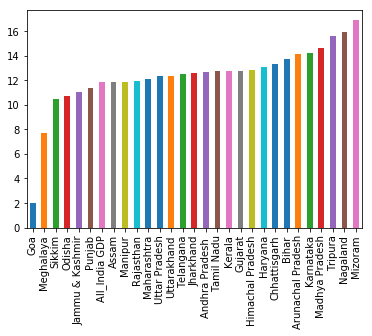

In [12]:
gdp_india_growth.iloc[4].plot(kind='bar')

Total GDP of the states for the year 2015-16

In [13]:
gdp_2015_16 = gdp_india_cp.iloc[[-2], 1:-1]
print(gdp_2015_16)

  Duration  Andhra Pradesh   Arunachal Pradesh     Assam     Bihar  \
4  2015-16         609934.0            18784.0  224234.0  413503.0   

   Chhattisgarh      Goa   Gujarat   Haryana  Himachal Pradesh     ...       \
4      260776.0  45002.0  994316.0  485184.0          88668.25     ...        

   Nagaland    Odisha     Punjab  Rajasthan   Sikkim  Tamil Nadu  Telangana  \
4   15121.0  341887.0  316771.75   523091.0  16637.0   1212668.0   575631.0   

    Tripura  Uttar Pradesh  Uttarakhand  
4  24032.75      1153795.0     184091.0  

[1 rows x 29 columns]


In [14]:
gdp_2015_16 = gdp_2015_16.set_index(gdp_2015_16.columns[0])
gdp_2015_16.sort_values('2015-16', axis = 1, inplace = True)

Total GDP of the states for the year 2015-16

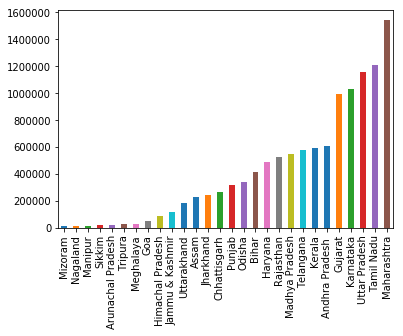

In [15]:
gdp_2015_16.iloc[0].plot(kind = "bar")

In [16]:
print("Lowest 5 states in terms of total GDP for the year 2015-16 are - ")
print(list(gdp_2015_16.columns[:5]))
print("Top 5 states in terms of total GDP for the year 2015-16 are - ") 
print(list(gdp_2015_16.columns[-5:]))

Top 5 states in terms of total GDP for the year 2015-16 are - 
['Mizoram', 'Nagaland', 'Manipur', 'Sikkim', 'Arunachal Pradesh']
Top 5 states in terms of total GDP for the year 2015-16 are - 
['Gujarat', 'Karnataka', 'Uttar Pradesh', 'Tamil Nadu', 'Maharashtra']


Part 1B

In [17]:
os.chdir("F:\\UpGrad\\GDP\\dataset\\states")

Getting the names of all file names present in the directory using glob

In [18]:
all_files = [file for file in glob.glob('*.{}'.format("csv"))]
print(all_files)

['NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv', 'NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv', 'NAD-Assam-GSVA_cur_2015-16.csv', 'NAD-Bihar-GSVA_cur_2015-16.csv', 'NAD-Chhattisgarh-GSVA_cur_2016-17.csv', 'NAD-Goa-GSVA_cur_2015-16.csv', 'NAD-Gujarat-GSVA_cur_2015-16.csv', 'NAD-Haryana-GSVA_cur_2016-17.csv', 'NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv', 'NAD-Jammu_Kashmir-GSVA_cur_2015-16.csv', 'NAD-Jharkhand-GSVA_cur_2015-16.csv', 'NAD-Karnataka-GSVA_cur_2015-16.csv', 'NAD-Kerala-GSVA_cur_2015-16.csv', 'NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv', 'NAD-Maharashtra-GSVA_cur_2014-15.csv', 'NAD-Manipur-GSVA_cur_2014-15.csv', 'NAD-Meghalaya-GSVA_cur_2016-17.csv', 'NAD-Mizoram-GSVA_cur_2014-15.csv', 'NAD-Nagaland-GSVA_cur_2014-15.csv', 'NAD-Odisha-GSVA_cur_2016-17.csv', 'NAD-Punjab-GSVA_cur_2014-15.csv', 'NAD-Rajasthan-GSVA_cur_2014-15.csv', 'NAD-Sikkim-GSVA_cur_2015-16.csv', 'NAD-Tamil_Nadu-GSVA_cur_2016-17.csv', 'NAD-Telangana-GSVA_cur_2016-17.csv', 'NAD-Tripura-GSVA_cur_2014-15.csv', 'NAD-Uttarakh

Merging all files

In [19]:
for file in all_files:
    temp = pd.read_csv(file, encoding = "unicode_escape")
    temp = temp[['S.No.', 'Item', '2014-15']]
    state = lambda x: x.split('-')
    temp.rename(columns = {'2014-15':state(file)[1]}, inplace= True)

    if file == all_files[0]:
        all_states = temp.copy(deep=True)
    else:
        temp["S.No."] = temp["S.No."].str.strip()
        temp["S.No."] = temp["S.No."].str.rstrip(".")
        temp["Item"] = temp["Item"].str.replace("*", "")
        all_states = pd.merge(all_states, temp, how = 'outer', on = ['S.No.', 'Item'])
    del temp

In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(all_states)

,S.No.,Item,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal_Pradesh,Jammu_Kashmir,Jharkhand,Karnataka,Kerala,Madhya_Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttarakhand,Uttar_Pradesh
0,1,"Agriculture, forestry and fishing",14819416,686117,3855548,7951890,3948847,308507,13769969.00,8015238.0,1514981,1586705,3211065,11219422,5930617,16235647,16475655,383140.0,366521.0,217010,607897,6422978,9285716,15044394,137447,13064238,7591501,799825.0,1601423.0,25097754
1,1.1,Crops,7893514,415520,2890544,4688237,2613371,140421,9671086.00,4636731.0,853758,949424,2094466,8157179,3070386,13216013,10435121,226583.0,223330.0,116609,375825,4382636,5690972,7673441,114976,7297820,4162493,397591.0,866146.0,16215212
2,1.2,Livestock,4309078,38387,173478,2060296,352208,30141,2698910.00,2916173.0,110304,433133,562503,1868771,1656104,1932769,3972829,75483.0,72442.0,45590,123800,788243,2638842,5356257,17338,4693361,2951299,88176.0,391188.0,7096876
3,1.3,Forestry and logging,346160,224017,261987,550132,597785,15744,761616.00,352254.0,540950,168093,445149,693082,499808,965588,1592564,45831.0,61166.0,47763,99802,791463,848245,1956660,4529,392705,210741,145096.0,339293.0,1404936
4,1.4,Fishing and aquaculture,2270664,8193,529539,653224,385483,122201,638357.00,110080.0,9968,36055,108947,500390,704319,121277,475141,35243.0,9583.0,7048,8470,460636,107657,58036,604,680352,266968,168961.0,4796.0,380730
5,2,Mining and quarrying,1484300,30842,1471149,68107,2451970,3622,2117218.00,25186.0,33385,33621,2037289,846882,558824,1618373,5282727,NaN,84529.0,8588,8280,2586328,10354,4069385,1329,265536,1541853,142391.0,244549.0,901501
6,Total,Primary,16303716,716959,5326697,8019997,6400817,312129,15887187.00,8040424.0,1548366,1620326,5248354,12066304,6489442,17854020,21758383,383140.0,451050.0,225598,616178,9009306,9296070,19113780,138776,13329774,9133354,942216.0,1845972.0,25999255
7,3,Manufacturing,4672266,26120,2002936,2189965,4370593,1177608,24087538.00,7756921.0,2543637,893207,4114148,12953843,4273567,4368833,33660294,49501.0,433213.0,8479,18346,5754229,4790341,6552580,550697,18914794,6353711,228625.0,5866252.0,12261649
8,4,"Electricity, gas, water supply & other utility...",1151729,113527,296587,345168,1198438,204110,3409983.00,1101919.0,767268,597421,337489,1425762,482470,1272905,4334702,27490.0,54473.0,128365,37944,833067,911611,1122888,212499,1710379,716266,77870.0,433880.0,2030625
9,5,Construction,4664889,147842,1733568,3449763,2669855,165819,5526017.00,3702571.0,808256,785503,1789834,6104799,7314003,4403151,9450211,143182.0,150256.0,133228,156072,2402396,2202962,5353326,82058,12216718,2854024,177899.0,1342733.0,11256450


In [22]:
all_states = all_states.set_index(all_states.columns[1])
all_states.drop("S.No.", axis = 1, inplace = True)
all_states.sort_values("Per Capita GSDP (Rs.)", axis = 1, ascending = False, inplace = True)

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(all_states)

,Goa,Sikkim,Haryana,Kerala,Uttarakhand,Maharashtra,Himachal_Pradesh,Tamil_Nadu,Karnataka,Gujarat,Telangana,Punjab,Arunachal_Pradesh,Andhra_Pradesh,Mizoram,Nagaland,Chhattisgarh,Rajasthan,Tripura,Meghalaya,Jammu_Kashmir,Odisha,Madhya_Pradesh,Jharkhand,Assam,Manipur,Uttar_Pradesh,Bihar
Item,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Agriculture, forestry and fishing",308507,137447,8015238.0,5930617,1601423.0,16475655,1514981,13064238,11219422,13769969.00,7591501,9285716,686117,14819416,217010,607897,3948847,15044394,799825.0,366521.0,1586705,6422978,16235647,3211065,3855548,383140.0,25097754,7951890
Crops,140421,114976,4636731.0,3070386,866146.0,10435121,853758,7297820,8157179,9671086.00,4162493,5690972,415520,7893514,116609,375825,2613371,7673441,397591.0,223330.0,949424,4382636,13216013,2094466,2890544,226583.0,16215212,4688237
Livestock,30141,17338,2916173.0,1656104,391188.0,3972829,110304,4693361,1868771,2698910.00,2951299,2638842,38387,4309078,45590,123800,352208,5356257,88176.0,72442.0,433133,788243,1932769,562503,173478,75483.0,7096876,2060296
Forestry and logging,15744,4529,352254.0,499808,339293.0,1592564,540950,392705,693082,761616.00,210741,848245,224017,346160,47763,99802,597785,1956660,145096.0,61166.0,168093,791463,965588,445149,261987,45831.0,1404936,550132
Fishing and aquaculture,122201,604,110080.0,704319,4796.0,475141,9968,680352,500390,638357.00,266968,107657,8193,2270664,7048,8470,385483,58036,168961.0,9583.0,36055,460636,121277,108947,529539,35243.0,380730,653224
Mining and quarrying,3622,1329,25186.0,558824,244549.0,5282727,33385,265536,846882,2117218.00,1541853,10354,30842,1484300,8588,8280,2451970,4069385,142391.0,84529.0,33621,2586328,1618373,2037289,1471149,NaN,901501,68107
Primary,312129,138776,8040424.0,6489442,1845972.0,21758383,1548366,13329774,12066304,15887187.00,9133354,9296070,716959,16303716,225598,616178,6400817,19113780,942216.0,451050.0,1620326,9009306,17854020,5248354,5326697,383140.0,25999255,8019997
Manufacturing,1177608,550697,7756921.0,4273567,5866252.0,33660294,2543637,18914794,12953843,24087538.00,6353711,4790341,26120,4672266,8479,18346,4370593,6552580,228625.0,433213.0,893207,5754229,4368833,4114148,2002936,49501.0,12261649,2189965
"Electricity, gas, water supply & other utility services",204110,212499,1101919.0,482470,433880.0,4334702,767268,1710379,1425762,3409983.00,716266,911611,113527,1151729,128365,37944,1198438,1122888,77870.0,54473.0,597421,833067,1272905,337489,296587,27490.0,2030625,345168


GDP per capita for all the states

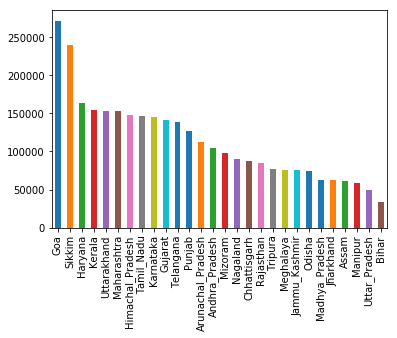

In [24]:
all_states.iloc[32].plot(kind = "bar")

In [25]:
print("Top 5 states based on GDP per capita are: " )
print(list(all_states.columns[:5]))
print("Last 5 states based on GDP per capita are: " )
print(list(all_states.columns[-5:]))

Top 5 states based on GDP per capita are: 
['Goa', 'Sikkim', 'Haryana', 'Kerala', 'Uttarakhand']
Last 5 states based on GDP per capita are: 
['Jharkhand', 'Assam', 'Manipur', 'Uttar_Pradesh', 'Bihar']


percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states

In [26]:
ratio = (all_states.iloc[-1][0])/(all_states.iloc[-1][-1])
print(ratio)
all_states.loc["%primary"] = (all_states.loc["Primary"]/all_states.loc["Gross State Domestic Product"])*100
all_states.loc["%secondary"] = (all_states.loc["Secondary"]/all_states.loc["Gross State Domestic Product"])*100
all_states.loc["%tertiary"] = (all_states.loc["Tertiary"]/all_states.loc["Gross State Domestic Product"])*100

8.004741709371503


In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(all_states)

,Goa,Sikkim,Haryana,Kerala,Uttarakhand,Maharashtra,Himachal_Pradesh,Tamil_Nadu,Karnataka,Gujarat,Telangana,Punjab,Arunachal_Pradesh,Andhra_Pradesh,Mizoram,Nagaland,Chhattisgarh,Rajasthan,Tripura,Meghalaya,Jammu_Kashmir,Odisha,Madhya_Pradesh,Jharkhand,Assam,Manipur,Uttar_Pradesh,Bihar
Item,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Agriculture, forestry and fishing",3.085070e+05,1.374470e+05,8.015238e+06,5.930617e+06,1.601423e+06,1.647566e+07,1.514981e+06,1.306424e+07,1.121942e+07,1.376997e+07,7.591501e+06,9.285716e+06,6.861170e+05,1.481942e+07,2.170100e+05,6.078970e+05,3.948847e+06,1.504439e+07,7.998250e+05,3.665210e+05,1.586705e+06,6.422978e+06,1.623565e+07,3.211065e+06,3.855548e+06,3.831400e+05,2.509775e+07,7.951890e+06
Crops,1.404210e+05,1.149760e+05,4.636731e+06,3.070386e+06,8.661460e+05,1.043512e+07,8.537580e+05,7.297820e+06,8.157179e+06,9.671086e+06,4.162493e+06,5.690972e+06,4.155200e+05,7.893514e+06,1.166090e+05,3.758250e+05,2.613371e+06,7.673441e+06,3.975910e+05,2.233300e+05,9.494240e+05,4.382636e+06,1.321601e+07,2.094466e+06,2.890544e+06,2.265830e+05,1.621521e+07,4.688237e+06
Livestock,3.014100e+04,1.733800e+04,2.916173e+06,1.656104e+06,3.911880e+05,3.972829e+06,1.103040e+05,4.693361e+06,1.868771e+06,2.698910e+06,2.951299e+06,2.638842e+06,3.838700e+04,4.309078e+06,4.559000e+04,1.238000e+05,3.522080e+05,5.356257e+06,8.817600e+04,7.244200e+04,4.331330e+05,7.882430e+05,1.932769e+06,5.625030e+05,1.734780e+05,7.548300e+04,7.096876e+06,2.060296e+06
Forestry and logging,1.574400e+04,4.529000e+03,3.522540e+05,4.998080e+05,3.392930e+05,1.592564e+06,5.409500e+05,3.927050e+05,6.930820e+05,7.616160e+05,2.107410e+05,8.482450e+05,2.240170e+05,3.461600e+05,4.776300e+04,9.980200e+04,5.977850e+05,1.956660e+06,1.450960e+05,6.116600e+04,1.680930e+05,7.914630e+05,9.655880e+05,4.451490e+05,2.619870e+05,4.583100e+04,1.404936e+06,5.501320e+05
Fishing and aquaculture,1.222010e+05,6.040000e+02,1.100800e+05,7.043190e+05,4.796000e+03,4.751410e+05,9.968000e+03,6.803520e+05,5.003900e+05,6.383570e+05,2.669680e+05,1.076570e+05,8.193000e+03,2.270664e+06,7.048000e+03,8.470000e+03,3.854830e+05,5.803600e+04,1.689610e+05,9.583000e+03,3.605500e+04,4.606360e+05,1.212770e+05,1.089470e+05,5.295390e+05,3.524300e+04,3.807300e+05,6.532240e+05
Mining and quarrying,3.622000e+03,1.329000e+03,2.518600e+04,5.588240e+05,2.445490e+05,5.282727e+06,3.338500e+04,2.655360e+05,8.468820e+05,2.117218e+06,1.541853e+06,1.035400e+04,3.084200e+04,1.484300e+06,8.588000e+03,8.280000e+03,2.451970e+06,4.069385e+06,1.423910e+05,8.452900e+04,3.362100e+04,2.586328e+06,1.618373e+06,2.037289e+06,1.471149e+06,NaN,9.015010e+05,6.810700e+04
Primary,3.121290e+05,1.387760e+05,8.040424e+06,6.489442e+06,1.845972e+06,2.175838e+07,1.548366e+06,1.332977e+07,1.206630e+07,1.588719e+07,9.133354e+06,9.296070e+06,7.169590e+05,1.630372e+07,2.255980e+05,6.161780e+05,6.400817e+06,1.911378e+07,9.422160e+05,4.510500e+05,1.620326e+06,9.009306e+06,1.785402e+07,5.248354e+06,5.326697e+06,3.831400e+05,2.599926e+07,8.019997e+06
Manufacturing,1.177608e+06,5.506970e+05,7.756921e+06,4.273567e+06,5.866252e+06,3.366029e+07,2.543637e+06,1.891479e+07,1.295384e+07,2.408754e+07,6.353711e+06,4.790341e+06,2.612000e+04,4.672266e+06,8.479000e+03,1.834600e+04,4.370593e+06,6.552580e+06,2.286250e+05,4.332130e+05,8.932070e+05,5.754229e+06,4.368833e+06,4.114148e+06,2.002936e+06,4.950100e+04,1.226165e+07,2.189965e+06
"Electricity, gas, water supply & other utility services",2.041100e+05,2.124990e+05,1.101919e+06,4.824700e+05,4.338800e+05,4.334702e+06,7.672680e+05,1.710379e+06,1.425762e+06,3.409983e+06,7.162660e+05,9.116110e+05,1.135270e+05,1.151729e+06,1.283650e+05,3.794400e+04,1.198438e+06,1.122888e+06,7.787000e+04,5.447300e+04,5.974210e+05,8.330670e+05,1.272905e+06,3.374890e+05,2.965870e+05,2.749000e+04,2.030625e+06,3.451680e+05


In [28]:
contri_all_states = all_states.loc[["%primary", "%secondary", "%tertiary"]]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(contri_all_states)

,Goa,Sikkim,Haryana,Kerala,Uttarakhand,Maharashtra,Himachal_Pradesh,Tamil_Nadu,Karnataka,Gujarat,Telangana,Punjab,Arunachal_Pradesh,Andhra_Pradesh,Mizoram,Nagaland,Chhattisgarh,Rajasthan,Tripura,Meghalaya,Jammu_Kashmir,Odisha,Madhya_Pradesh,Jharkhand,Assam,Manipur,Uttar_Pradesh,Bihar
Item,,,,,,,,,,,,,,,,,,,,,,,,,,,,
%primary,7.681649,9.124399,18.379705,12.337288,11.395924,12.141131,14.835527,12.200454,13.090107,17.750506,17.867280,25.260312,42.774946,30.968080,19.516529,33.462038,27.239629,31.221746,31.76014,18.479544,16.137988,27.981738,37.042942,24.174023,26.889201,21.235110,24.918511,21.448437
%secondary,38.085628,55.574637,28.714286,22.946744,47.182463,26.474323,39.467373,30.059475,22.222466,36.896684,19.413996,21.480109,17.152064,19.923102,23.363984,11.532434,35.061805,21.282116,16.32788,26.136520,22.669630,27.920823,20.840810,28.748340,20.359070,12.202845,24.486707,16.005825
%tertiary,42.778382,31.763595,43.950252,56.413780,34.496805,49.455948,39.603084,48.824418,54.774663,33.764756,55.697682,45.427474,37.696846,41.850453,55.160550,53.923268,32.295173,42.495993,50.04645,49.190903,55.906700,38.066351,37.589312,37.462331,46.982347,65.252434,44.058108,59.317437


Item,%primary,%secondary,%tertiary
Andhra_Pradesh,30.968080,19.923102,41.850453
Arunachal_Pradesh,42.774946,17.152064,37.696846
Assam,26.889201,20.359070,46.982347
Bihar,21.448437,16.005825,59.317437
Chhattisgarh,27.239629,35.061805,32.295173
Goa,7.681649,38.085628,42.778382
Gujarat,17.750506,36.896684,33.764756
Haryana,18.379705,28.714286,43.950252
Himachal_Pradesh,14.835527,39.467373,39.603084
Jammu_Kashmir,16.137988,22.669630,55.906700


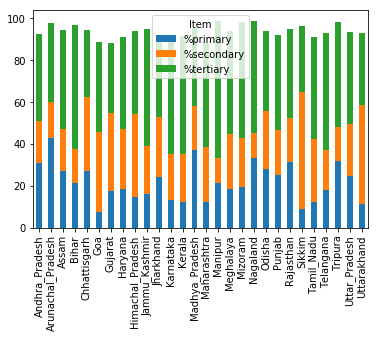

In [29]:
contri_all_states_t = contri_all_states.transpose()

contri_all_states_t.sort_index(inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(contri_all_states_t)
    
contri_all_states_t.plot.bar(stacked = True)

In [31]:
group_all_states = all_states.loc[["Per Capita GSDP (Rs.)"]]

In [32]:
group_all_states_t = group_all_states.transpose()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(group_all_states_t)

Item,Per Capita GSDP (Rs.)
Goa,271793.0
Sikkim,240274.0
Haryana,164077.0
Kerala,154778.0
Uttarakhand,153076.0
Maharashtra,152853.0
Himachal_Pradesh,147330.0
Tamil_Nadu,146503.0
Karnataka,145141.0
Gujarat,141263.0


In [33]:
a = group_all_states_t.quantile([0.20, 0.50, 0.85, 1])
a = list(a["Per Capita GSDP (Rs.)"])
print(a[0], a[1], a[2], a[3])

67385.0 101332.0 153064.85 271793.0


In [48]:
all_states_cat = all_states.copy()
all_states_cat = all_states_cat.transpose()

In [49]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(all_states_cat)

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services related to broadcasting",Railways,Road transport,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),%primary,%secondary,%tertiary
Goa,308507.0,140421.0,30141.0,15744.0,122201.0,3622.0,312129.0,1177608.0,204110.0,165819.0,1547536.0,380927.0,343492.0,37434.0,189656.0,15649.0,46171.0,17820.0,46359.0,19272.0,357.0,44028.0,233618.0,407099.0,346486.0,180431.0,1738217.0,3597882.0,527279.00,61854.0,4063307.0,14950.0,271793.0,7.681649,38.085628,42.778382
Sikkim,137447.0,114976.0,17338.0,4529.0,604.0,1329.0,138776.0,550697.0,212499.0,82058.0,845253.0,70568.0,64624.0,5945.0,47347.0,0.0,35283.0,0.0,0.0,0.0,0.0,12064.0,21079.0,75330.0,119514.0,149265.0,483103.0,1467133.0,72200.00,18400.0,1520933.0,6330.0,240274.0,9.124399,55.574637,31.763595
Haryana,8015238.0,4636731.0,2916173.0,352254.0,110080.0,25186.0,8040424.0,7756921.0,1101919.0,3702571.0,12561411.0,4986319.0,4817784.0,168535.0,2560623.0,423873.0,1452364.0,NaN,NaN,190269.0,14459.0,479658.0,1671486.0,6970183.0,1036377.0,2001581.0,19226568.0,39828404.0,4985670.00,1067867.0,43746207.0,266620.0,164077.0,18.379705,28.714286,43.950252
Kerala,5930617.0,3070386.0,1656104.0,499808.0,704319.0,558824.0,6489442.0,4273567.0,482470.0,7314003.0,12070040.0,8557345.0,7763847.0,793498.0,4020934.0,147897.0,2761427.0,26956.0,125029.0,71567.0,3290.0,884767.0,2010306.0,7287633.0,2068915.0,5728645.0,29673778.0,48233259.0,5189352.00,822381.0,52600230.0,339843.0,154778.0,12.337288,22.946744,56.413780
Uttarakhand,1601423.0,866146.0,391188.0,339293.0,4796.0,244549.0,1845972.0,5866252.0,433880.0,1342733.0,7642865.0,1743106.0,1534073.0,209033.0,1066693.0,21295.0,307147.0,NaN,3889.0,-76.0,660.0,733778.0,385030.0,831307.0,579409.0,982430.0,5587975.0,15076812.0,1434856.00,313139.0,16198529.0,105820.0,153076.0,11.395924,47.182463,34.496805
Maharashtra,16475655.0,10435121.0,3972829.0,1592564.0,475141.0,5282727.0,21758383.0,33660294.0,4334702.0,9450211.0,47445207.0,15839100.0,14286902.0,1552198.0,9697246.0,797933.0,4644123.0,223626.0,174188.0,1175023.0,131237.0,2551115.0,16143324.0,30718051.0,5426991.0,10806363.0,88631076.0,157834665.0,25394800.00,4017300.0,179212165.0,1172450.0,152853.0,12.141131,26.474323,49.455948
Himachal_Pradesh,1514981.0,853758.0,110304.0,540950.0,9968.0,33385.0,1548366.0,2543637.0,767268.0,808256.0,4119162.0,615496.0,494162.0,121333.0,552234.0,2528.0,349608.0,0.0,3979.0,1724.0,129.0,194266.0,362521.0,1125937.0,553974.0,923164.0,4133326.0,9800853.0,895317.00,259291.0,10436879.0,70840.0,147330.0,14.835527,39.467373,39.603084
Tamil_Nadu,13064238.0,7297820.0,4693361.0,392705.0,680352.0,265536.0,13329774.0,18914794.0,1710379.0,12216718.0,32841892.0,12895842.0,11252588.0,1643253.0,7188320.0,468553.0,3660994.0,70414.0,180836.0,864407.0,39834.0,1903283.0,5598498.0,16830213.0,3400800.0,7430115.0,53343788.0,99515453.0,12507325.00,2766405.0,109256373.0,745760.0,146503.0,12.200454,30.059475,48.824418
Karnataka,11219422.0,8157179.0,1868771.0,693082.0,500390.0,846882.0,12066304.0,12953843.0,1425762.0,6104799.0,20484404.0,8991658.0,7523720.0,1467938.0,5097652.0,259482.0,3194576.0,24152.0,171785.0,55349.0,42787.0,1349520.0,4094169.0,24766393.0,2232584.0,5308174.0,50490630.0,83041338.0,11026674.00,1889206.0,92178806.0,635100.0,145141.0,13.090107,22.222466,54.774663
Gujarat,13769969.0,9671086.0,2698910.0,761616.0,638357.0,2117218.0,1588718

Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest).

In [ ]:
def cat(row):
    if row["Per Capita GSDP (Rs.)"] <= a[3] and row["Per Capita GSDP (Rs.)"] > a[2]:
        val = "C1"
    elif row["Per Capita GSDP (Rs.)"] <= a[2] and row["Per Capita GSDP (Rs.)"] > a[1]:
        val = "C2"
    elif row["Per Capita GSDP (Rs.)"] <= a[1] and row["Per Capita GSDP (Rs.)"] > a[0]:
        val = "C3"
    else:
        val = "C4"
    return val

all_states_cat["Category"] = all_states_cat.apply(cat, axis = 1)

In [51]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(all_states_cat)

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services related to broadcasting",Railways,Road transport,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),%primary,%secondary,%tertiary,Category
Goa,308507.0,140421.0,30141.0,15744.0,122201.0,3622.0,312129.0,1177608.0,204110.0,165819.0,1547536.0,380927.0,343492.0,37434.0,189656.0,15649.0,46171.0,17820.0,46359.0,19272.0,357.0,44028.0,233618.0,407099.0,346486.0,180431.0,1738217.0,3597882.0,527279.00,61854.0,4063307.0,14950.0,271793.0,7.681649,38.085628,42.778382,C1
Sikkim,137447.0,114976.0,17338.0,4529.0,604.0,1329.0,138776.0,550697.0,212499.0,82058.0,845253.0,70568.0,64624.0,5945.0,47347.0,0.0,35283.0,0.0,0.0,0.0,0.0,12064.0,21079.0,75330.0,119514.0,149265.0,483103.0,1467133.0,72200.00,18400.0,1520933.0,6330.0,240274.0,9.124399,55.574637,31.763595,C1
Haryana,8015238.0,4636731.0,2916173.0,352254.0,110080.0,25186.0,8040424.0,7756921.0,1101919.0,3702571.0,12561411.0,4986319.0,4817784.0,168535.0,2560623.0,423873.0,1452364.0,NaN,NaN,190269.0,14459.0,479658.0,1671486.0,6970183.0,1036377.0,2001581.0,19226568.0,39828404.0,4985670.00,1067867.0,43746207.0,266620.0,164077.0,18.379705,28.714286,43.950252,C1
Kerala,5930617.0,3070386.0,1656104.0,499808.0,704319.0,558824.0,6489442.0,4273567.0,482470.0,7314003.0,12070040.0,8557345.0,7763847.0,793498.0,4020934.0,147897.0,2761427.0,26956.0,125029.0,71567.0,3290.0,884767.0,2010306.0,7287633.0,2068915.0,5728645.0,29673778.0,48233259.0,5189352.00,822381.0,52600230.0,339843.0,154778.0,12.337288,22.946744,56.413780,C1
Uttarakhand,1601423.0,866146.0,391188.0,339293.0,4796.0,244549.0,1845972.0,5866252.0,433880.0,1342733.0,7642865.0,1743106.0,1534073.0,209033.0,1066693.0,21295.0,307147.0,NaN,3889.0,-76.0,660.0,733778.0,385030.0,831307.0,579409.0,982430.0,5587975.0,15076812.0,1434856.00,313139.0,16198529.0,105820.0,153076.0,11.395924,47.182463,34.496805,C1
Maharashtra,16475655.0,10435121.0,3972829.0,1592564.0,475141.0,5282727.0,21758383.0,33660294.0,4334702.0,9450211.0,47445207.0,15839100.0,14286902.0,1552198.0,9697246.0,797933.0,4644123.0,223626.0,174188.0,1175023.0,131237.0,2551115.0,16143324.0,30718051.0,5426991.0,10806363.0,88631076.0,157834665.0,25394800.00,4017300.0,179212165.0,1172450.0,152853.0,12.141131,26.474323,49.455948,C2
Himachal_Pradesh,1514981.0,853758.0,110304.0,540950.0,9968.0,33385.0,1548366.0,2543637.0,767268.0,808256.0,4119162.0,615496.0,494162.0,121333.0,552234.0,2528.0,349608.0,0.0,3979.0,1724.0,129.0,194266.0,362521.0,1125937.0,553974.0,923164.0,4133326.0,9800853.0,895317.00,259291.0,10436879.0,70840.0,147330.0,14.835527,39.467373,39.603084,C2
Tamil_Nadu,13064238.0,7297820.0,4693361.0,392705.0,680352.0,265536.0,13329774.0,18914794.0,1710379.0,12216718.0,32841892.0,12895842.0,11252588.0,1643253.0,7188320.0,468553.0,3660994.0,70414.0,180836.0,864407.0,39834.0,1903283.0,5598498.0,16830213.0,3400800.0,7430115.0,53343788.0,99515453.0,12507325.00,2766405.0,109256373.0,745760.0,146503.0,12.200454,30.059475,48.824418,C2
Karnataka,11219422.0,8157179.0,1868771.0,693082.0,500390.0,846882.0,12066304.0,12953843.0,1425762.0,6104799.0,20484404.0,8991658.0,7523720.0,1467938.0,5097652.0,259482.0,3194576.0,24152.0,171785.0,55349.0,42787.0,1349520.0,4094169.0,24766393.0,2232584.0,5308174.0,50490630.0,83041338.0,11026674.00,1889206.0,92178806.0,635100.0,145141.0,13.090107,22.222466,54.774663,C2
Gujarat,13769969.0,9671086.0,2698910.0

In [52]:
all_states_cat.drop(["Crops", "Livestock", "Forestry and logging", "Fishing and aquaculture", "Primary", "Secondary", "Trade & repair services", "Hotels & restaurants", "Railways", "Road transport", "Water transport", "Air transport", "Services incidental to transport", "Storage", "Communication & services related to broadcasting", "Tertiary", "TOTAL GSVA at basic prices", "Taxes on Products", "Subsidies on products", "Population ('00)", "%primary", "%secondary", "%tertiary"], inplace = True, axis = 1)

In [53]:
all_states_grouped = all_states_cat.groupby("Category")

In [54]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(all_states_grouped.get_group("C1"))
    display(all_states_grouped.get_group("C2"))
    display(all_states_grouped.get_group("C3"))
    display(all_states_grouped.get_group("C4"))

Item,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product,Per Capita GSDP (Rs.),Category
Goa,308507.0,3622.0,1177608.0,204110.0,165819.0,380927.0,189656.0,233618.0,407099.0,346486.0,180431.0,4063307.0,271793.0,C1
Sikkim,137447.0,1329.0,550697.0,212499.0,82058.0,70568.0,47347.0,21079.0,75330.0,119514.0,149265.0,1520933.0,240274.0,C1
Haryana,8015238.0,25186.0,7756921.0,1101919.0,3702571.0,4986319.0,2560623.0,1671486.0,6970183.0,1036377.0,2001581.0,43746207.0,164077.0,C1
Kerala,5930617.0,558824.0,4273567.0,482470.0,7314003.0,8557345.0,4020934.0,2010306.0,7287633.0,2068915.0,5728645.0,52600230.0,154778.0,C1
Uttarakhand,1601423.0,244549.0,5866252.0,433880.0,1342733.0,1743106.0,1066693.0,385030.0,831307.0,579409.0,982430.0,16198529.0,153076.0,C1


Item,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product,Per Capita GSDP (Rs.),Category
Maharashtra,16475655.0,5282727.0,33660294.0,4334702.0,9450211.0,15839100.0,9697246.0,16143324.0,30718051.0,5426991.0,10806363.0,179212165.0,152853.0,C2
Himachal_Pradesh,1514981.0,33385.0,2543637.0,767268.0,808256.0,615496.0,552234.0,362521.0,1125937.0,553974.0,923164.0,10436879.0,147330.0,C2
Tamil_Nadu,13064238.0,265536.0,18914794.0,1710379.0,12216718.0,12895842.0,7188320.0,5598498.0,16830213.0,3400800.0,7430115.0,109256373.0,146503.0,C2
Karnataka,11219422.0,846882.0,12953843.0,1425762.0,6104799.0,8991658.0,5097652.0,4094169.0,24766393.0,2232584.0,5308174.0,92178806.0,145141.0,C2
Gujarat,13769969.0,2117218.0,24087538.0,3409983.0,5526017.0,10178713.0,4555910.0,4606644.0,5179502.0,2576195.0,3123413.0,89502727.0,141263.0,C2
Telangana,7591501.0,1541853.0,6353711.0,716266.0,2854024.0,6494607.0,3604741.0,3023729.0,9478839.0,1711265.0,4158229.0,51117765.0,139035.0,C2
Punjab,9285716.0,10354.0,4790341.0,911611.0,2202962.0,4419919.0,1951809.0,2057520.0,3142786.0,1842730.0,3303041.0,36801089.0,126606.0,C2
Arunachal_Pradesh,686117.0,30842.0,26120.0,113527.0,147842.0,60421.0,35203.0,25207.0,48418.0,243867.0,218728.0,1676119.0,112718.0,C2
Andhra_Pradesh,14819416.0,1484300.0,4672266.0,1151729.0,4664889.0,4233400.0,5076984.0,1900863.0,4405409.0,2200897.0,4215389.0,52646842.0,104977.0,C2


Item,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product,Per Capita GSDP (Rs.),Category
Mizoram,217010.0,8588.0,8479.0,128365.0,133228.0,114315.0,52587.0,23168.0,55068.0,206259.0,186222.0,1155933.0,97687.0,C3
Nagaland,607897.0,8280.0,18346.0,37944.0,156072.0,140781.0,77521.0,60393.0,159651.0,295424.0,259186.0,1841424.0,89607.0,C3
Chhattisgarh,3948847.0,2451970.0,4370593.0,1198438.0,2669855.0,1535571.0,871770.0,739057.0,2462166.0,867982.0,1112232.0,23498180.0,86860.0,C3
Rajasthan,15044394.0,4069385.0,6552580.0,1122888.0,5353326.0,7297290.0,3814461.0,1827413.0,6451997.0,2460364.0,4164287.0,61219447.0,84837.0,C3
Tripura,799825.0,142391.0,228625.0,77870.0,177899.0,390423.0,155956.0,86094.0,190704.0,338244.0,323287.0,2966662.0,77358.0,C3
Meghalaya,366521.0,84529.0,433213.0,54473.0,150256.0,383974.0,148189.0,64091.0,150409.0,239782.0,214211.0,2440807.0,76228.0,C3
Jammu_Kashmir,1586705.0,33621.0,893207.0,597421.0,785503.0,889931.0,712552.0,374011.0,1340082.0,1349880.0,946826.0,10040446.0,75840.0,C3
Odisha,6422978.0,2586328.0,5754229.0,833067.0,2402396.0,3149555.0,2034016.0,1065147.0,2348714.0,1318221.0,2340603.0,32197092.0,73979.0,C3


Item,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product,Per Capita GSDP (Rs.),Category
Madhya_Pradesh,16235647.0,1618373.0,4368833.0,1272905.0,4403151.0,5357515.0,2865802.0,1988794.0,2660123.0,2497321.0,2747805.0,48198169.0,62989.0,C4
Jharkhand,3211065.0,2037289.0,4114148.0,337489.0,1789834.0,1991359.0,1470022.0,551441.0,1656784.0,1088325.0,1375410.0,21710718.0,62091.0,C4
Assam,3855548.0,1471149.0,2002936.0,296587.0,1733568.0,2987155.0,1194568.0,543651.0,1412466.0,1373611.0,1795658.0,19809800.0,60621.0,C4
Manipur,383140.0,NaN,49501.0,27490.0,143182.0,262950.0,109726.0,30315.0,159335.0,297078.0,317930.0,1804276.0,58442.0,C4
Uttar_Pradesh,25097754.0,901501.0,12261649.0,2030625.0,11256450.0,9437243.0,7404509.0,3392275.0,14548185.0,6152124.0,5034623.0,104337115.0,49450.0,C4
Bihar,7951890.0,68107.0,2189965.0,345168.0,3449763.0,7448373.0,3147173.0,1178022.0,3740641.0,2078171.0,4587589.0,37391988.0,33954.0,C4


In [56]:
all_states_sum = all_states_grouped.sum()

In [67]:
all_states_sum_copy = all_states_sum.copy()
all_states_sum_copy = all_states_sum_copy.transpose()

In [68]:
all_states_sum_copy.iloc[:] = (all_states_sum_copy.iloc[:]/all_states_sum_copy.loc["Gross State Domestic Product"])*100

In [69]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(all_states_sum_copy)

Category,C1,C2,C3,C4
Item,,,,
Gross State Domestic Product,100.000000,100.000000,100.000000,100.000000
Manufacturing,16.613203,17.340648,13.489416,10.712459
"Agriculture, forestry and fishing",13.538762,14.197645,21.420049,24.323490
"Trade, repair, hotels and restaurants",13.322925,10.232211,10.270273,11.783216
"Real estate, ownership of dwelling & professional services",13.181797,15.364664,9.721330,10.365410
Construction,10.672368,7.060643,8.738575,9.764521
Other services,7.654629,6.339883,7.052936,6.799089
"Transport, storage, communication & services related to broadcasting",6.675109,6.062677,5.811948,6.941761
Financial services,3.658299,6.071087,3.131925,3.294504


In [72]:
all_states_sum.sort_values(by = "C1", axis = 1, ascending = False, inplace = True)
print("Top categories comprising almost 80% of total GSDP for C1 states: ")
print(all_states_sum_copy.iloc[1:8, 0:1])
print(all_states_sum_copy.iloc[1:8, 0:1].sum())

Top categories comprising almost 80% of total GSDP for C1 states: 
Category                                                   C1
Item                                                         
Manufacturing                                       16.613203
Agriculture, forestry and fishing                   13.538762
Trade, repair, hotels and restaurants               13.322925
Real estate, ownership of dwelling & profession...  13.181797
Construction                                        10.672368
Other services                                       7.654629
Transport, storage, communication & services re...   6.675109
Category
C1    81.658792
dtype: float64


In [61]:
all_states_sum_copy.sort_values(by = "C2", ascending = False, inplace = True)
print("Top categories comprising almost 80% of total GSDP for C2 states: ")
print(all_states_sum_copy.iloc[1:9, 1:2])
print(all_states_sum_copy.iloc[1:9, 1:2].sum())

Top categories comprising almost 80% of total GSDP for C2 states: 
Category                                                   C2
Item                                                         
Manufacturing                                       17.340648
Real estate, ownership of dwelling & profession...  15.364664
Agriculture, forestry and fishing                   14.197645
Trade, repair, hotels and restaurants               10.232211
Construction                                         7.060643
Other services                                       6.339883
Financial services                                   6.071087
Transport, storage, communication & services re...   6.062677
Category
C2    82.669459
dtype: float64


In [62]:
all_states_sum_copy.sort_values(by = "C3", ascending = False, inplace = True)
print("Top categories comprising almost 80% of total GSDP for C2 states: ")
print(all_states_sum_copy.iloc[1:9, 2:3])
print(all_states_sum_copy.iloc[1:9, 2:3].sum())

Top categories comprising almost 80% of total GSDP for C2 states: 
Category                                                   C3
Item                                                         
Agriculture, forestry and fishing                   21.420049
Manufacturing                                       13.489416
Trade, repair, hotels and restaurants               10.270273
Real estate, ownership of dwelling & profession...   9.721330
Construction                                         8.738575
Other services                                       7.052936
Mining and quarrying                                 6.933431
Transport, storage, communication & services re...   5.811948
Category
C3    83.437958
dtype: float64


In [63]:
all_states_sum_copy.sort_values(by = "C4", ascending = False, inplace = True)
print("Top categories comprising almost 80% of total GSDP for C2 states: ")
print(all_states_sum_copy.iloc[1:8, 3:4])
print(all_states_sum_copy.iloc[1:8, 3:4].sum())

Top categories comprising almost 80% of total GSDP for C2 states: 
Category                                                   C4
Item                                                         
Agriculture, forestry and fishing                   24.323490
Trade, repair, hotels and restaurants               11.783216
Manufacturing                                       10.712459
Real estate, ownership of dwelling & profession...  10.365410
Construction                                         9.764521
Transport, storage, communication & services re...   6.941761
Other services                                       6.799089
Category
C4    80.689947
dtype: float64


In [73]:
all_states_sum_copy = all_states_sum_copy.transpose()
all_states_sum_copy.drop(["Gross State Domestic Product", "Per Capita GSDP (Rs.)"], axis = 1, inplace = True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(all_states_sum_copy)

Item,Manufacturing,"Agriculture, forestry and fishing","Trade, repair, hotels and restaurants","Real estate, ownership of dwelling & professional services",Construction,Other services,"Transport, storage, communication & services related to broadcasting",Financial services,Public administration,"Electricity, gas, water supply & other utility services",Mining and quarrying
Category,,,,,,,,,,,
C1,16.613203,13.538762,13.322925,13.181797,10.672368,7.654629,6.675109,3.658299,3.513696,2.061199,0.705592
C2,17.340648,14.197645,10.232211,15.364664,7.060643,6.339883,6.062677,6.071087,3.241550,2.334707,1.864573
C3,13.489416,21.420049,10.270273,9.721330,8.738575,7.052936,5.811948,3.131925,5.227657,2.992366,6.933431
C4,10.712459,24.323490,11.783216,10.365410,9.764521,6.799089,6.941761,3.294504,5.781998,1.847900,2.613661


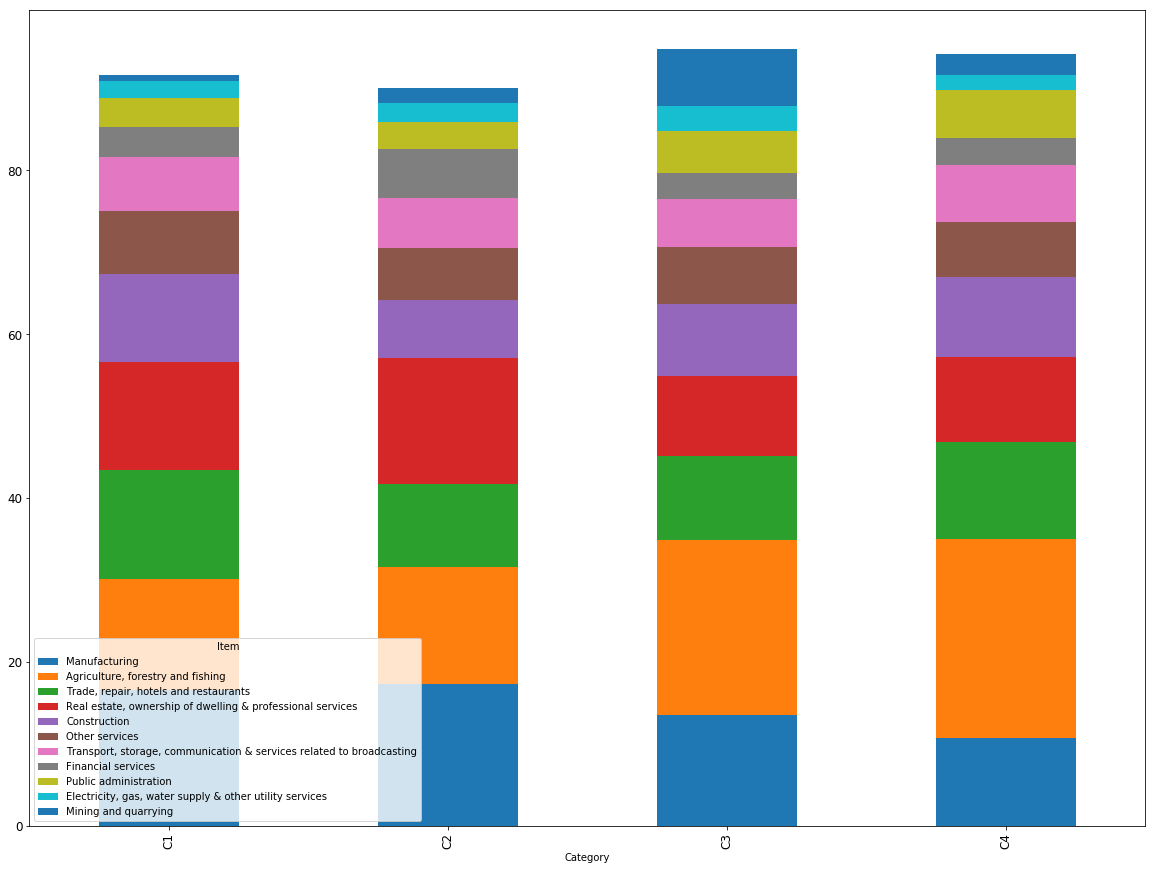

In [74]:
all_states_sum_copy.plot.bar(stacked = True, figsize=(20, 15), legend=True, fontsize=12)

Part II

In [75]:
os.chdir("F:\\UpGrad\\GDP\\dataset")
drop_india = pd.read_csv("dropout_rates.csv")
drop_india

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.870,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.710,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.110,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.060,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.900,NaN,NaN,NaN
5,6,Chandigarh,NaN,NaN,NaN,0.10,1.08,0.44,NaN,NaN,NaN,13.65,11.28,10.55
6,7,Chhatisgarh,4.14,1.42,2.91,5.42,3.80,5.85,14.86,23.41,21.260,NaN,NaN,2.76
7,8,Dadra & Nagar Haveli,NaN,1.57,1.47,3.38,4.13,4.02,24.41,28.59,16.770,9.65,6.24,9.47
8,9,Daman & Diu,NaN,0.85,1.11,NaN,3.58,3.11,11.52,19.86,32.270,1.26,9.86,40.48
9,10,Delhi,NaN,NaN,NaN,NaN,2.78,0.76,5.32,8.90,11.810,14.47,16.25,17.32


In [76]:
drop_india.drop(["Sl. No.", "Primary - 2012-2013", "Primary - 2014-2015", "Upper Primary - 2012-2013", "Upper Primary - 2013-2014", "Secondary - 2012-2013", "Secondary - 2013-2014", "Senior Secondary - 2012-2013", "Senior Secondary - 2013-2014", "Senior Secondary - 2014-2015"], axis = 1, inplace = True)
drop_india.drop([0, 5, 7, 8, 9, 18, 26, 35], inplace = True)
drop_india

,Level of Education - State,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015
1,Andhra Pradesh,6.72,5.20,15.71
2,Arunachal Pradesh,10.82,6.71,17.11
3,Assam,15.36,10.51,27.06
4,Bihar,NaN,4.08,25.90
6,Chhatisgarh,2.91,5.85,21.26
10,Goa,0.73,0.07,11.15
11,Gujarat,0.89,6.41,25.04
12,Haryana,5.61,5.81,15.89
13,Himachal Pradesh,0.64,0.87,6.07
14,Jammu and Kashmir,6.79,5.44,17.28


In [77]:
drop_india.rename(columns = {"Level of Education - State" : "State", "Primary - 2014-2015.1" : "Primary", "Upper Primary - 2014-2015" : "Upper Primary", "Secondary - 2014-2015" : "Secondary"}, inplace = True)
drop_india = drop_india.reset_index(drop = True)
drop_india = drop_india.set_index(drop_india.columns[0])
drop_india

,Primary,Upper Primary,Secondary
State,,,
Andhra Pradesh,6.72,5.20,15.71
Arunachal Pradesh,10.82,6.71,17.11
Assam,15.36,10.51,27.06
Bihar,NaN,4.08,25.90
Chhatisgarh,2.91,5.85,21.26
Goa,0.73,0.07,11.15
Gujarat,0.89,6.41,25.04
Haryana,5.61,5.81,15.89
Himachal Pradesh,0.64,0.87,6.07


In [78]:
all_states_drop = all_states.copy()
all_states_drop.rename(columns = {"Item" : "", "Andhra_Pradesh" : "Andhra Pradesh", "Arunachal_Pradesh" : "Arunachal Pradesh", "Himachal_Pradesh" : "Himachal Pradesh", "Jammu_Kashmir" : "Jammu and Kashmir", "Madhya_Pradesh" : "Madhya Pradesh", "Tamil_Nadu" : "Tamil Nadu", "Uttar_Pradesh" : "Uttar Pradesh"}, inplace = True)
all_states_drop

,Goa,Sikkim,Haryana,Kerala,Uttarakhand,Maharashtra,Himachal Pradesh,Tamil Nadu,Karnataka,Gujarat,...,Tripura,Meghalaya,Jammu and Kashmir,Odisha,Madhya Pradesh,Jharkhand,Assam,Manipur,Uttar Pradesh,Bihar
Item,,,,,,,,,,,,,,,,,,,,,
"Agriculture, forestry and fishing",3.085070e+05,1.374470e+05,8.015238e+06,5.930617e+06,1.601423e+06,1.647566e+07,1.514981e+06,1.306424e+07,1.121942e+07,1.376997e+07,...,7.998250e+05,3.665210e+05,1.586705e+06,6.422978e+06,1.623565e+07,3.211065e+06,3.855548e+06,3.831400e+05,2.509775e+07,7.951890e+06
Crops,1.404210e+05,1.149760e+05,4.636731e+06,3.070386e+06,8.661460e+05,1.043512e+07,8.537580e+05,7.297820e+06,8.157179e+06,9.671086e+06,...,3.975910e+05,2.233300e+05,9.494240e+05,4.382636e+06,1.321601e+07,2.094466e+06,2.890544e+06,2.265830e+05,1.621521e+07,4.688237e+06
Livestock,3.014100e+04,1.733800e+04,2.916173e+06,1.656104e+06,3.911880e+05,3.972829e+06,1.103040e+05,4.693361e+06,1.868771e+06,2.698910e+06,...,8.817600e+04,7.244200e+04,4.331330e+05,7.882430e+05,1.932769e+06,5.625030e+05,1.734780e+05,7.548300e+04,7.096876e+06,2.060296e+06
Forestry and logging,1.574400e+04,4.529000e+03,3.522540e+05,4.998080e+05,3.392930e+05,1.592564e+06,5.409500e+05,3.927050e+05,6.930820e+05,7.616160e+05,...,1.450960e+05,6.116600e+04,1.680930e+05,7.914630e+05,9.655880e+05,4.451490e+05,2.619870e+05,4.583100e+04,1.404936e+06,5.501320e+05
Fishing and aquaculture,1.222010e+05,6.040000e+02,1.100800e+05,7.043190e+05,4.796000e+03,4.751410e+05,9.968000e+03,6.803520e+05,5.003900e+05,6.383570e+05,...,1.689610e+05,9.583000e+03,3.605500e+04,4.606360e+05,1.212770e+05,1.089470e+05,5.295390e+05,3.524300e+04,3.807300e+05,6.532240e+05
Mining and quarrying,3.622000e+03,1.329000e+03,2.518600e+04,5.588240e+05,2.445490e+05,5.282727e+06,3.338500e+04,2.655360e+05,8.468820e+05,2.117218e+06,...,1.423910e+05,8.452900e+04,3.362100e+04,2.586328e+06,1.618373e+06,2.037289e+06,1.471149e+06,NaN,9.015010e+05,6.810700e+04
Primary,3.121290e+05,1.387760e+05,8.040424e+06,6.489442e+06,1.845972e+06,2.175838e+07,1.548366e+06,1.332977e+07,1.206630e+07,1.588719e+07,...,9.422160e+05,4.510500e+05,1.620326e+06,9.009306e+06,1.785402e+07,5.248354e+06,5.326697e+06,3.831400e+05,2.599926e+07,8.019997e+06
Manufacturing,1.177608e+06,5.506970e+05,7.756921e+06,4.273567e+06,5.866252e+06,3.366029e+07,2.543637e+06,1.891479e+07,1.295384e+07,2.408754e+07,...,2.286250e+05,4.332130e+05,8.932070e+05,5.754229e+06,4.368833e+06,4.114148e+06,2.002936e+06,4.950100e+04,1.226165e+07,2.189965e+06
"Electricity, gas, water supply & other utility services",2.041100e+05,2.124990e+05,1.101919e+06,4.824700e+05,4.338800e+05,4.334702e+06,7.672680e+05,1.710379e+06,1.425762e+06,3.409983e+06,...,7.787000e+04,5.447300e+04,5.974210e+05,8.330670e+05,1.272905e+06,3.374890e+05,2.965870e+05,2.749000e+04,2.030625e+06,3.451680e+05


In [80]:
all_states_drop = all_states_drop[-4:-3]
all_states_drop

,Goa,Sikkim,Haryana,Kerala,Uttarakhand,Maharashtra,Himachal Pradesh,Tamil Nadu,Karnataka,Gujarat,...,Tripura,Meghalaya,Jammu and Kashmir,Odisha,Madhya Pradesh,Jharkhand,Assam,Manipur,Uttar Pradesh,Bihar
Item,,,,,,,,,,,,,,,,,,,,,
Per Capita GSDP (Rs.),271793.0,240274.0,164077.0,154778.0,153076.0,152853.0,147330.0,146503.0,145141.0,141263.0,...,77358.0,76228.0,75840.0,73979.0,62989.0,62091.0,60621.0,58442.0,49450.0,33954.0


In [81]:
all_states_drop.rename(columns = {"Chhattisgarh" : "Chhatisgarh", "Uttarakhand" : "Uttrakhand"}, inplace = True)
all_states_drop

C:\Users\sanan\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Goa,Sikkim,Haryana,Kerala,Uttrakhand,Maharashtra,Himachal Pradesh,Tamil Nadu,Karnataka,Gujarat,...,Tripura,Meghalaya,Jammu and Kashmir,Odisha,Madhya Pradesh,Jharkhand,Assam,Manipur,Uttar Pradesh,Bihar
Item,,,,,,,,,,,,,,,,,,,,,
Per Capita GSDP (Rs.),271793.0,240274.0,164077.0,154778.0,153076.0,152853.0,147330.0,146503.0,145141.0,141263.0,...,77358.0,76228.0,75840.0,73979.0,62989.0,62091.0,60621.0,58442.0,49450.0,33954.0


In [82]:
all_states_drop = all_states_drop.transpose()
all_states_drop

Item,Per Capita GSDP (Rs.)
Goa,271793.0
Sikkim,240274.0
Haryana,164077.0
Kerala,154778.0
Uttrakhand,153076.0
Maharashtra,152853.0
Himachal Pradesh,147330.0
Tamil Nadu,146503.0
Karnataka,145141.0
Gujarat,141263.0


In [83]:
all_states_drop.index.name = "State"
all_states_drop

Item,Per Capita GSDP (Rs.)
State,
Goa,271793.0
Sikkim,240274.0
Haryana,164077.0
Kerala,154778.0
Uttrakhand,153076.0
Maharashtra,152853.0
Himachal Pradesh,147330.0
Tamil Nadu,146503.0
Karnataka,145141.0


In [84]:
all_states_drop_pc = pd.merge(drop_india, all_states_drop, how = 'outer', on = ['State'])
all_states_drop_pc

,Primary,Upper Primary,Secondary,Per Capita GSDP (Rs.)
State,,,,
Andhra Pradesh,6.72,5.20,15.71,104977.0
Arunachal Pradesh,10.82,6.71,17.11,112718.0
Assam,15.36,10.51,27.06,60621.0
Bihar,NaN,4.08,25.90,33954.0
Chhatisgarh,2.91,5.85,21.26,86860.0
Goa,0.73,0.07,11.15,271793.0
Gujarat,0.89,6.41,25.04,141263.0
Haryana,5.61,5.81,15.89,164077.0
Himachal Pradesh,0.64,0.87,6.07,147330.0


<function matplotlib.pyplot.show(*args, **kw)>

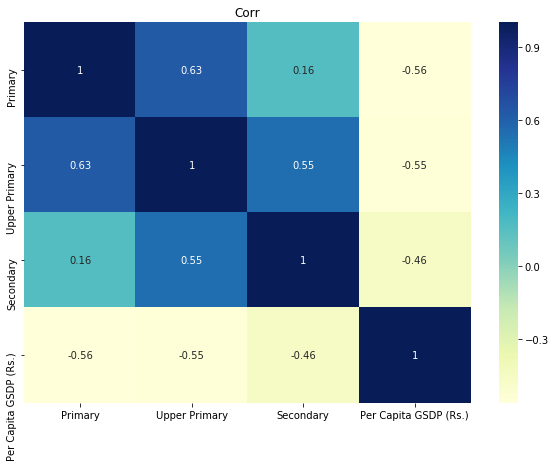

In [87]:
new = all_states_drop_pc.corr()
plt.figure(figsize = (10,7))
sns.heatmap(new, annot = True, cmap = "YlGnBu")
plt.title("Corr")
plt.show